# Chemical Reactions

## Tutorial

This tutorial will show you how to: 

1. Define reactions from SMARTS or Blocks
2. Basic reactions examples
3. Fragment replacement examples

In [1]:
import datamol as dm

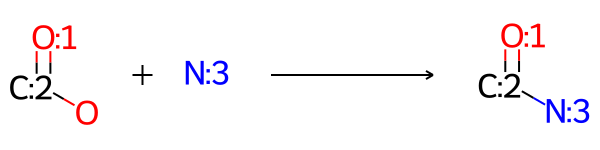

In [2]:
# Define a reaction from rxn block file
rxn = dm.reactions.rxn_from_block_file("data/ReactionBlock.rxn", sanitize=True)
rxn

In [3]:
dm.reactions.is_reaction_ok(rxn, enable_logs=True)

2022-10-18 15:33:48.135 | INFO     | datamol.reactions._reactions:is_reaction_ok:152 - Number of warnings:0
2022-10-18 15:33:48.136 | INFO     | datamol.reactions._reactions:is_reaction_ok:153 - Number of preprocessing errors: 0
2022-10-18 15:33:48.137 | INFO     | datamol.reactions._reactions:is_reaction_ok:154 - Number of reactants in reaction: 2
2022-10-18 15:33:48.138 | INFO     | datamol.reactions._reactions:is_reaction_ok:155 - Number of products in reaction: 1
2022-10-18 15:33:48.138 | INFO     | datamol.reactions._reactions:is_reaction_ok:156 - Preprocess labels added:((), ())


True

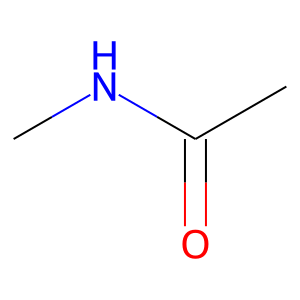

In [4]:
# Apply reaction and sanitize the products
prod_mols = dm.reactions.apply_reaction(
    rxn=rxn,
    reactants=(dm.to_mol("CC(=O)O"), dm.to_mol("NC")),
    as_smiles=False,
    sanitize=True,
    single_product_group=False,
    product_index=0
)
dm.to_image(prod_mols)

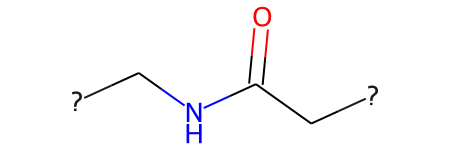

In [5]:
# Return a single product in SMILES and keep the open attachment points
prod_smi_att = dm.reactions.apply_reaction(
    rxn=rxn,
    reactants=(dm.to_mol("[2*]CC(=O)O"), dm.to_mol("NC[1*]")),
    as_smiles=False,
    sanitize=True,
    single_product_group=True,
    rm_attach=False,
    product_index=0
)
prod_smi_att

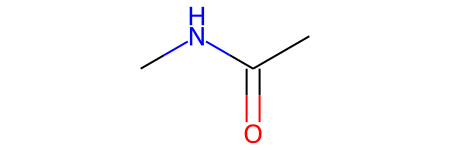

In [6]:
# Return a single product in SMILES without any open attachment points
prod_mol = dm.reactions.apply_reaction(
    rxn=rxn,
    reactants=(dm.to_mol("[2*]CC(=O)O"), dm.to_mol("NC[1*]")),
    as_smiles=False,
    sanitize=True,
    single_product_group=True,
    rm_attach=True,
    product_index=0
)
prod_mol

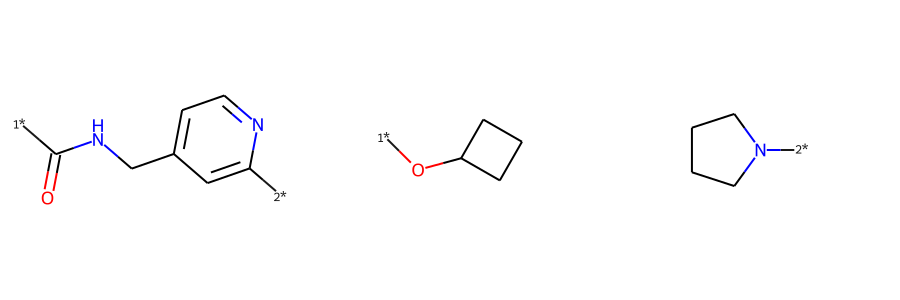

In [7]:
scaffold = dm.to_mol("O=C(NCc1ccnc([2*])c1)[1*]")
frag1 = dm.to_mol("[1*]OC1CCC1")
frag2 = dm.to_mol("[2*]N1CCCC1")
dm.to_image([scaffold, frag1, frag2])

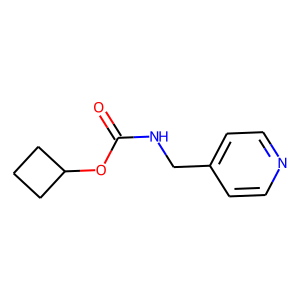

In [8]:
# Define reaction with SMARTS and apply reaction on the specified attachment points

rxn1 = dm.reactions.rxn_from_smarts("[1*][*:1].[1*][*:2]>>[*:1][*:2]")
res1 = dm.reactions.apply_reaction(rxn1, (dm.to_mol(frag1), dm.to_mol(scaffold)), rm_attach=True, product_index=0)
dm.to_image(res1)

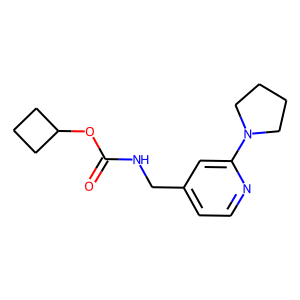

In [9]:
# One reaction to attach multiple specified attachment points
rxn2 = dm.reactions.rxn_from_smarts("[1*][*:1].[2*][*:4].([1*][*:2].[2*][*:3])>>([*:1][*:2].[*:3][*:4])")
res2 = dm.reactions.apply_reaction(rxn2, (frag1, frag2, scaffold), product_index=0)
dm.to_image(res2)

## References

- [RDKit Documentation](https://www.rdkit.org/docs/source/rdkit.Chem.rdChemReactions.html)